In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
pokemon.shape

(800, 13)

In [4]:
pokemon.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [5]:
base_color = sb.color_palette()[0]

In [6]:
order_generation = pokemon.Generation.value_counts().index

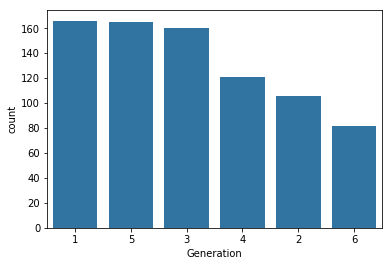

In [7]:
sb.countplot(data=pokemon, x='Generation', color=base_color, order=order_generation);

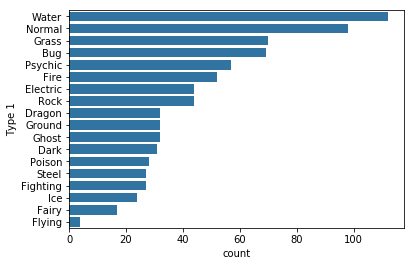

In [8]:
type_order = pokemon['Type 1'].value_counts().index
sb.countplot(data=pokemon, y='Type 1', color=base_color, order=type_order);

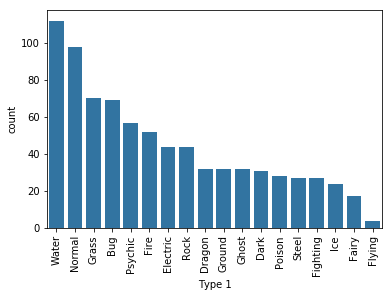

In [9]:
sb.countplot(data=pokemon, x='Type 1', color=base_color, order=type_order);
plt.xticks(rotation = 90);

In [11]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [16]:
type_counts = pokemon['Type 1'].value_counts()
type_order = type_counts.index

n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]


112

In [17]:
max_prop = max_type_count / n_pokemon

In [20]:
ticks_prop = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in ticks_prop]

In [21]:
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

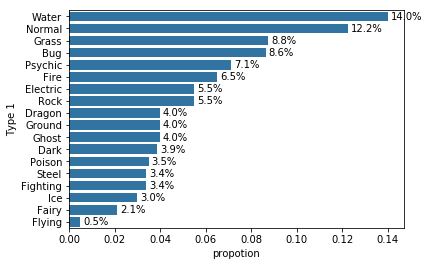

In [25]:
sb.countplot(data=pokemon, y='Type 1', color=base_color, order=type_order)
plt.xticks(ticks_prop * n_pokemon, tick_names)
plt.xlabel('propotion')

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100* count / n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

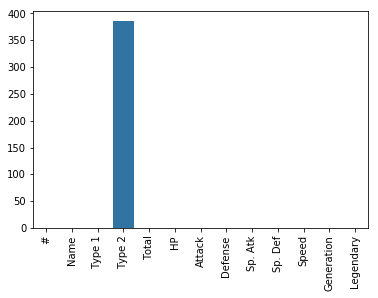

In [33]:
na_counts = pokemon.isna().sum()
sb.barplot(na_counts.index.values, na_counts, color=base_color)
plt.xticks(rotation = 90);

In [35]:
ticks_prop * n_pokemon

array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112.])